teo-input-spect.png
gen-input-spect.png
rays generated, time = 4seconds
Pasing rays
Number of rays on Detector 4
Time total: 0 seconds
Time per ray (s): 0.0seconds


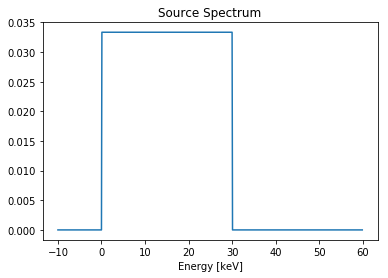

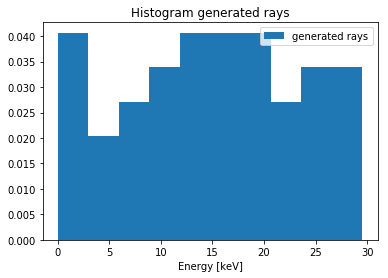

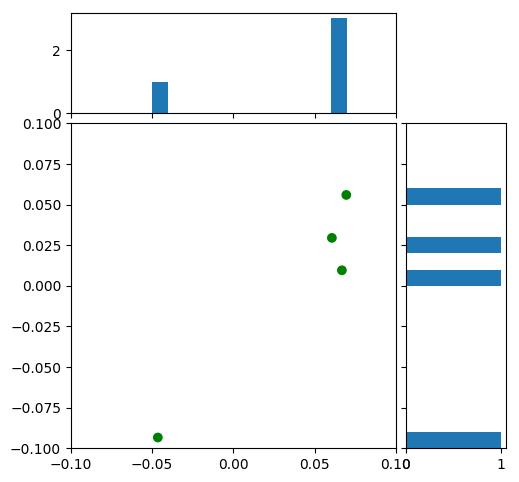

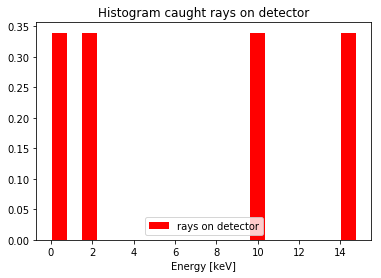

Rays saved in file : run02.csv
[<foxsisim.ray.Ray object at 0x118628908>, <foxsisim.ray.Ray object at 0x118628a20>, <foxsisim.ray.Ray object at 0x118628b70>, <foxsisim.ray.Ray object at 0x118628d68>]
Done!


In [1]:
## Generate rays and save them in a CSV file for Iridium mirrors.
## @Milo
## October 2017

from foxsisim.module import Module
from foxsisim.detector import Detector
from foxsisim.source import Source
from foxsisim.plotting import plot,scatterHist
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


nrays = 50            ## Number of rays
max_energy = 30.0       ## Maximum energy


''' Defining Spectrum '''
def spectrum(z):
        if (type(z) is not type([1])) and (type(z) is not type(np.array(1))):
            x = np.array([z])
        else:
            x = np.array(z)
        return np.piecewise(x, [x < 0, ((x < max_energy) & (x > 0)), (x >= max_energy)], [0, 1./max_energy, 0])

source_distance = -1e4      ## cm
source = Source(type='point', center=[0, 0, source_distance])
source.loadSpectrum(spectrum)
energies = np.arange(-10, 60, 0.1)
plt.plot(energies, source._spectrum(energies))
plt.xlabel('Energy [keV]')
plt.title('Source Spectrum')
print('teo-input-spect.png')
plt.savefig('teo-input-spect.png',dpi=100)


''' Creating the FOXSI telescope '''
#module = Module(radii = [5.151,4.9,4.659,4.429,4.21,4.0,3.799], #7Shells
module = Module(radii = [5.151,4.9,4.659,4.429,4.21,4.0,3.799,3.59,3.38,3.17], #10Shells
                seglen=30.0,
                base=[0,0,0],
                focal=200,
                angles=None,
                conic=False)
detector = Detector(width=10, 
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

''' Generating rays '''
tstart = datetime.now()
rays = source.generateRays(module.targetFront, nrays)
plt.figure()
plt.hist([ray.energy for ray in rays], normed=True, label='generated rays')
plt.xlabel('Energy [keV]')
plt.title('Histogram generated rays')
plt.legend()
print('gen-input-spect.png')
plt.savefig('gen-input-spect.png', dpi=100)
tgen = datetime.now()
print('rays generated, time = ' + str((tgen - tstart).seconds) + 'seconds' )

print('Pasing rays')
module.passRays(rays, robust=True)
detector.catchRays(rays)


rays_on_detector = len(detector.rays)
print('Number of rays on Detector ' + str(rays_on_detector))
print('Time total: ' + str((datetime.now() - tgen).seconds) + ' seconds')
print('Time per ray (s): ' + str(float((datetime.now() - tgen).seconds)/rays_on_detector) + 'seconds')

drays = [ray for ray in rays if ray.des[2]==230.0]
scatterHist(drays)
plt.savefig('photons_on_detec.png', dpi=100)

plt.figure()
plt.hist([ray.energy for ray in detector.rays], normed=True, label='rays on detector',color='r',bins=20)
plt.xlabel('Energy [keV]')
plt.title('Histogram caught rays on detector')
plt.legend()
plt.show(block=False)
plt.savefig('output_spect_on_detec.png',dpi=100)

from foxsisim.util import save_rays
save_rays(rays,filename='run02.csv')
print(detector.rays)
print('Done!')

In [ ]:
print('Number of rays : {:d}'.format(len(rays)))
detector = Detector(width=10, 
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

drays = [ray for ray in rays if ray.des[2]==230.0]
print(len(drays))
scatterHist(drays)
plt.show()

In [ ]:
for ray in drays:
    print(ray.ori)

In [ ]:
drays[0].ori

In [67]:
drays[0].ori[0]**2 + drays[0].ori[1]**2 + drays[0].ori[2]**2

1.0

In [68]:
drays[0].pos

array([  2.84033383e-02,   9.07291984e-02,   2.30000000e+02])

In [69]:
drays[0].des

array([  2.84033383e-02,   9.07291984e-02,   2.30000000e+02])

In [80]:
print(rays[0].hist[0],rays[0].hist[1])

[     0.      0. -10000.] [  1.99676791  -4.27012811  20.51182538]


In [74]:
rays[2].hist

[array([     0.,      0., -10000.]),
 array([ -1.57828115,   4.99522197,  16.2720619 ]),
 array([ -1.46391388,   4.6332523 ,  45.06712373]),
 array([ -1.46391388,   4.6332523 ,  45.06712373])]

In [81]:
for ray in rays:
    print(ray.bounces)

1
1
3
1
1
1
2
1
2
1


In [82]:
rays[6].hist

[array([     0.,      0., -10000.]),
 array([  1.14132542,   4.08922447,  23.22229005]),
 array([  1.09908939,   3.93789813,  37.68991733]),
 array([  2.27155038e-02,   8.13867742e-02,   2.30000000e+02])]

In [83]:
rays[6].hist[-2]

array([  1.09908939,   3.93789813,  37.68991733])

In [84]:
rays[6].hist[-2][0]

1.0990893891427802

In [3]:
for ray in rays:
    print(ray.bounces)

2
1
2
1
1
2
1
1
1
2
1
1
1
2
3
2
2
1
2
3
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
3
1
2
1
1
1
1
1
3
3


In [4]:
rays[0].hist[-2]

array([-3.92817685, -0.1204473 ,  1.92999069])

In [9]:
## Reading Rays
from foxsisim.util import load_rays
Rrays = load_rays('/Users/Kamilobu/Desktop/Read_Rays/run02.csv')
print('Number of rays : {:d}'.format(len(Rrays)))


Rays from /Users/Kamilobu/Desktop/Read_Rays/run02.csv loaded.
Number of rays : 5
